## Importing Necessary Libraries

In [1]:
import time
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision

## Loading the CIFAR-10 dataset

In [2]:
device = ""
if torch.cuda.is_available(): device = "cuda"
else: device = "cpu"

print("device used :- "+device)

device used :- cuda


In [3]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))
])

train = torchvision.datasets.CIFAR10(root="./cifar10",train=True,download=True,transform=transform)
train_loader = torch.utils.data.DataLoader(train,batch_size=256,shuffle=True,num_workers = 4)

test = torchvision.datasets.CIFAR10(root="./cifar10",train=True,download=True,transform=transform)
test_loader = torch.utils.data.DataLoader(test,batch_size=256,shuffle=False,num_workers = 4)

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./cifar10/cifar-10-python.tar.gz to ./cifar10


/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py:554: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Files already downloaded and verified


## CNN with 2 convolutional layers and 2 FC layers

In [4]:
class Cnn1_relu(nn.Module):
    def __init__(self):
        super(Cnn1_relu, self).__init__()
        
        self.network = nn.Sequential(
            nn.Conv2d(3, 8, 5),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),

            nn.Conv2d(8,16,5),
            nn.ReLU(),
            nn.MaxPool2d(2, 2), 

            nn.Flatten(), 
            nn.Linear(16*5*5,128),
            nn.ReLU(),
            nn.Linear(128,10))
        
    def forward(self, x):
        x = self.network(x)
        return x

class Cnn1_sigmoid(nn.Module):
    def __init__(self):
        super(Cnn1_sigmoid, self).__init__()
        
        self.network = nn.Sequential(
            nn.Conv2d(3, 8, 5),
            nn.Sigmoid(),
            nn.MaxPool2d(2, 2),

            nn.Conv2d(8,16,5),
            nn.Sigmoid(),
            nn.MaxPool2d(2, 2), 

            nn.Flatten(), 
            nn.Linear(16*5*5,128),
            nn.Sigmoid(),
            nn.Linear(128,10))
        
    def forward(self, x):
        x = self.network(x)
        return x

class Cnn1_tanh(nn.Module):
    def __init__(self):
        super(Cnn1_tanh, self).__init__()
        
        self.network = nn.Sequential(
            nn.Conv2d(3, 8, 5),
            nn.Tanh(),
            nn.MaxPool2d(2, 2),

            nn.Conv2d(8,16,5),
            nn.Tanh(),
            nn.MaxPool2d(2, 2), 

            nn.Flatten(), 
            nn.Linear(16*5*5,128),
            nn.Tanh(),
            nn.Linear(128,10))
        
    def forward(self, x):
        x = self.network(x)
        return x

Cnn1_relu()
Cnn1_sigmoid()
Cnn1_tanh()

Cnn1_tanh(
  (network): Sequential(
    (0): Conv2d(3, 8, kernel_size=(5, 5), stride=(1, 1))
    (1): Tanh()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(8, 16, kernel_size=(5, 5), stride=(1, 1))
    (4): Tanh()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Flatten(start_dim=1, end_dim=-1)
    (7): Linear(in_features=400, out_features=128, bias=True)
    (8): Tanh()
    (9): Linear(in_features=128, out_features=10, bias=True)
  )
)

## CNN with 3 convolutional layers and 2 FC layers

In [53]:
class Cnn2_relu(nn.Module):
    def __init__(self):
        super(Cnn2_relu, self).__init__()
        
        self.network = nn.Sequential(
            nn.Conv2d(3, 8, kernel_size=5, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2), 

            nn.Conv2d(8, 16, kernel_size=5, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2), 

            nn.Conv2d(16, 32, kernel_size=5, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2), 

            nn.Flatten(), 
            nn.Linear(32*2*2,64),
            nn.ReLU(),
            nn.Linear(64,10))
        
    def forward(self, x):
        x = self.network(x)
        return x

class Cnn2_sigmoid(nn.Module):
    def __init__(self):
        super(Cnn2_sigmoid, self).__init__()
        
        self.network = nn.Sequential(
            nn.Conv2d(3, 8, kernel_size=5, stride=1, padding=1),
            nn.Sigmoid(),
            nn.MaxPool2d(2, 2), 

            nn.Conv2d(8, 16, kernel_size=5, stride=1, padding=1),
            nn.Sigmoid(),
            nn.MaxPool2d(2, 2), 

            nn.Conv2d(16, 32, kernel_size=5, stride=1, padding=1),
            nn.Sigmoid(),
            nn.MaxPool2d(2, 2), 

            nn.Flatten(), 
            nn.Linear(32*2*2,64),
            nn.Sigmoid(),
            nn.Linear(64,10))
        
    def forward(self, x):
        x = self.network(x)
        return x
  
class Cnn2_tanh(nn.Module):
    def __init__(self):
        super(Cnn2_tanh, self).__init__()
        
        self.network = nn.Sequential(
            nn.Conv2d(3, 8, kernel_size=5, stride=1, padding=1),
            nn.Tanh(),
            nn.MaxPool2d(2, 2), 

            nn.Conv2d(8, 16, kernel_size=5, stride=1, padding=1),
            nn.Tanh(),
            nn.MaxPool2d(2, 2), 

            nn.Conv2d(16, 32, kernel_size=5, stride=1, padding=1),
            nn.Tanh(),
            nn.MaxPool2d(2, 2), 

            nn.Flatten(), 
            nn.Linear(32*2*2,64),
            nn.Tanh(),
            nn.Linear(64,10))
        
    def forward(self, x):
        x = self.network(x)
        return x

Cnn2_relu()
Cnn2_sigmoid()
Cnn2_tanh()

Cnn2_tanh(
  (network): Sequential(
    (0): Conv2d(3, 8, kernel_size=(5, 5), stride=(1, 1), padding=(1, 1))
    (1): Tanh()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(8, 16, kernel_size=(5, 5), stride=(1, 1), padding=(1, 1))
    (4): Tanh()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1), padding=(1, 1))
    (7): Tanh()
    (8): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (9): Flatten(start_dim=1, end_dim=-1)
    (10): Linear(in_features=128, out_features=64, bias=True)
    (11): Tanh()
    (12): Linear(in_features=64, out_features=10, bias=True)
  )
)

In [54]:
cnn1_relu = Cnn1_relu().to(device)
cnn2_relu = Cnn2_relu().to(device)
cnn1_sigmoid = Cnn1_sigmoid().to(device)
cnn2_sigmoid = Cnn2_sigmoid().to(device)
cnn1_tanh = Cnn1_tanh().to(device)
cnn2_tanh = Cnn2_tanh().to(device)

## Train, Test and Plotting the Graph

In [8]:
def train(model,n,optimizer,criterion):
    training_start_time = time.time()
    losses = []

    for epoch in range(n):
        running_loss = 0.0
        for i, (inputs,labels) in enumerate(train_loader):
            inputs = inputs.to(device)
            labels = labels.to(device)

            # Forward and backward propagation along with optimization
            optimizer.zero_grad()        
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()    
            
            running_loss += loss.item()
        print('Epoch : %d Loss: %.3f' % (epoch + 1,running_loss/256))
        losses.append(running_loss/256)
                
    print('Training Finished in %.2f s' % (time.time() - training_start_time))
    return model,losses

In [9]:
def test(model):
    total = 0
    correct = 0
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    print('Classification Accuracy: %.2f' % (100 * correct / total))

In [10]:
def plot(x):
    x = np.asarray(x)
    y = np.arange(1,len(x)+1)
    plt.xlabel("Epoch")
    plt.ylabel("Running Loss")   
    plt.plot(y,x)
    plt.show()

## Running Models with Different Optimizers

In [11]:
def run(model,n):
  criterion = nn.CrossEntropyLoss()
  optimizer_adam = optim.Adam(model.parameters(), lr=0.01)
  optimizer_adagrad = optim.Adagrad(model.parameters(), lr=0.01)
  optimizer_sgd = optim.SGD(model.parameters(), lr=0.01,momentum=0.8)
  optimizer_sgd_without_momentum = optim.SGD(model.parameters(), lr=0.01,momentum=0)
  optimizers = [optimizer_adam,optimizer_adagrad,optimizer_sgd,optimizer_sgd_without_momentum]

  for optimizer in optimizers:
    trained_model, losses = train(model,n,optimizer,criterion)
    plot(losses)
    test(trained_model)

/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py:554: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Epoch : 1 Loss: 1.232
Epoch : 2 Loss: 1.034
Epoch : 3 Loss: 0.965
Epoch : 4 Loss: 0.917
Epoch : 5 Loss: 0.899
Epoch : 6 Loss: 0.868
Epoch : 7 Loss: 0.848
Epoch : 8 Loss: 0.817
Epoch : 9 Loss: 0.815
Epoch : 10 Loss: 0.815
Epoch : 11 Loss: 0.785
Epoch : 12 Loss: 0.779
Epoch : 13 Loss: 0.779
Epoch : 14 Loss: 0.767
Epoch : 15 Loss: 0.756
Epoch : 16 Loss: 0.739
Epoch : 17 Loss: 0.742
Epoch : 18 Loss: 0.745
Epoch : 19 Loss: 0.735
Epoch : 20 Loss: 0.719
Epoch : 21 Loss: 0.715
Epoch : 22 Loss: 0.720
Epoch : 23 Loss: 0.712
Epoch : 24 Loss: 0.698
Epoch : 25 Loss: 0.693
Epoch : 26 Loss: 0.698
Epoch : 27 Loss: 0.693
Epoch : 28 Loss: 0.689
Epoch : 29 Loss: 0.688
Epoch : 30 Loss: 0.682
Epoch : 31 Loss: 0.683
Epoch : 32 Loss: 0.676
Epoch : 33 Loss: 0.678
Epoch : 34 Loss: 0.670
Epoch : 35 Loss: 0.663
Epoch : 36 Loss: 0.669
Epoch : 37 Loss: 0.661
Epoch : 38 Loss: 0.662
Epoch : 39 Loss: 0.655
Epoch : 40 Loss: 0.650
Epoch : 41 Loss: 0.645
Epoch : 42 Loss: 0.661
Epoch : 43 Loss: 0.665
Epoch : 44 Loss: 0.6

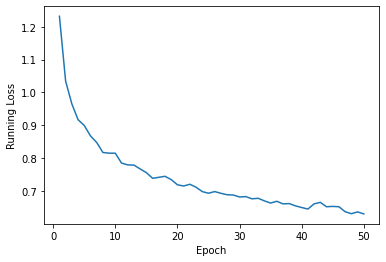

Classification Accuracy: 73.06
Epoch : 1 Loss: 0.502
Epoch : 2 Loss: 0.462
Epoch : 3 Loss: 0.451
Epoch : 4 Loss: 0.445
Epoch : 5 Loss: 0.440
Epoch : 6 Loss: 0.437
Epoch : 7 Loss: 0.434
Epoch : 8 Loss: 0.431
Epoch : 9 Loss: 0.429
Epoch : 10 Loss: 0.428
Epoch : 11 Loss: 0.426
Epoch : 12 Loss: 0.424
Epoch : 13 Loss: 0.423
Epoch : 14 Loss: 0.421
Epoch : 15 Loss: 0.420
Epoch : 16 Loss: 0.419
Epoch : 17 Loss: 0.418
Epoch : 18 Loss: 0.417
Epoch : 19 Loss: 0.416
Epoch : 20 Loss: 0.415
Epoch : 21 Loss: 0.414
Epoch : 22 Loss: 0.414
Epoch : 23 Loss: 0.412
Epoch : 24 Loss: 0.412
Epoch : 25 Loss: 0.411
Epoch : 26 Loss: 0.411
Epoch : 27 Loss: 0.410
Epoch : 28 Loss: 0.409
Epoch : 29 Loss: 0.408
Epoch : 30 Loss: 0.408
Epoch : 31 Loss: 0.407
Epoch : 32 Loss: 0.407
Epoch : 33 Loss: 0.406
Epoch : 34 Loss: 0.406
Epoch : 35 Loss: 0.405
Epoch : 36 Loss: 0.405
Epoch : 37 Loss: 0.404
Epoch : 38 Loss: 0.403
Epoch : 39 Loss: 0.403
Epoch : 40 Loss: 0.402
Epoch : 41 Loss: 0.402
Epoch : 42 Loss: 0.401
Epoch : 43 L

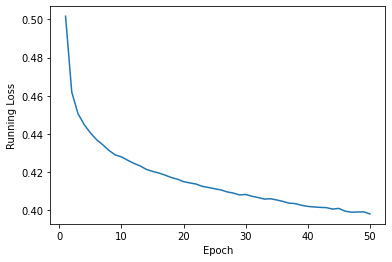

Classification Accuracy: 81.69
Epoch : 1 Loss: 0.426
Epoch : 2 Loss: 0.431
Epoch : 3 Loss: 0.428
Epoch : 4 Loss: 0.427
Epoch : 5 Loss: 0.426
Epoch : 6 Loss: 0.427
Epoch : 7 Loss: 0.425
Epoch : 8 Loss: 0.425
Epoch : 9 Loss: 0.426
Epoch : 10 Loss: 0.424
Epoch : 11 Loss: 0.421
Epoch : 12 Loss: 0.421
Epoch : 13 Loss: 0.423
Epoch : 14 Loss: 0.421
Epoch : 15 Loss: 0.420
Epoch : 16 Loss: 0.421
Epoch : 17 Loss: 0.423
Epoch : 18 Loss: 0.418
Epoch : 19 Loss: 0.420
Epoch : 20 Loss: 0.419
Epoch : 21 Loss: 0.421
Epoch : 22 Loss: 0.419
Epoch : 23 Loss: 0.420
Epoch : 24 Loss: 0.419
Epoch : 25 Loss: 0.416
Epoch : 26 Loss: 0.417
Epoch : 27 Loss: 0.418
Epoch : 28 Loss: 0.420
Epoch : 29 Loss: 0.419
Epoch : 30 Loss: 0.416
Epoch : 31 Loss: 0.416
Epoch : 32 Loss: 0.417
Epoch : 33 Loss: 0.415
Epoch : 34 Loss: 0.414
Epoch : 35 Loss: 0.416
Epoch : 36 Loss: 0.414
Epoch : 37 Loss: 0.413
Epoch : 38 Loss: 0.416
Epoch : 39 Loss: 0.415
Epoch : 40 Loss: 0.413
Epoch : 41 Loss: 0.415
Epoch : 42 Loss: 0.416
Epoch : 43 L

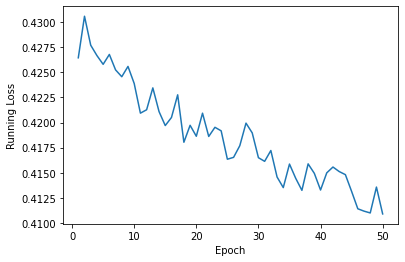

Classification Accuracy: 80.44
Epoch : 1 Loss: 0.391
Epoch : 2 Loss: 0.389
Epoch : 3 Loss: 0.388
Epoch : 4 Loss: 0.388
Epoch : 5 Loss: 0.388
Epoch : 6 Loss: 0.388
Epoch : 7 Loss: 0.388
Epoch : 8 Loss: 0.388
Epoch : 9 Loss: 0.388
Epoch : 10 Loss: 0.388
Epoch : 11 Loss: 0.388
Epoch : 12 Loss: 0.388
Epoch : 13 Loss: 0.388
Epoch : 14 Loss: 0.388
Epoch : 15 Loss: 0.387
Epoch : 16 Loss: 0.388
Epoch : 17 Loss: 0.387
Epoch : 18 Loss: 0.387
Epoch : 19 Loss: 0.387
Epoch : 20 Loss: 0.386
Epoch : 21 Loss: 0.387
Epoch : 22 Loss: 0.387
Epoch : 23 Loss: 0.387
Epoch : 24 Loss: 0.387
Epoch : 25 Loss: 0.387
Epoch : 26 Loss: 0.386
Epoch : 27 Loss: 0.387
Epoch : 28 Loss: 0.387
Epoch : 29 Loss: 0.386
Epoch : 30 Loss: 0.386
Epoch : 31 Loss: 0.386
Epoch : 32 Loss: 0.386
Epoch : 33 Loss: 0.386
Epoch : 34 Loss: 0.386
Epoch : 35 Loss: 0.386
Epoch : 36 Loss: 0.386
Epoch : 37 Loss: 0.385
Epoch : 38 Loss: 0.386
Epoch : 39 Loss: 0.386
Epoch : 40 Loss: 0.385
Epoch : 41 Loss: 0.385
Epoch : 42 Loss: 0.386
Epoch : 43 L

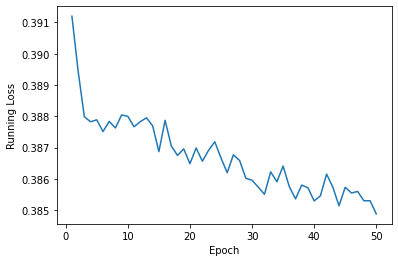

Classification Accuracy: 81.92


In [12]:
run(cnn1_relu,50)

/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py:554: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Epoch : 1 Loss: 1.485
Epoch : 2 Loss: 1.172
Epoch : 3 Loss: 1.068
Epoch : 4 Loss: 0.994
Epoch : 5 Loss: 0.940
Epoch : 6 Loss: 0.886
Epoch : 7 Loss: 0.840
Epoch : 8 Loss: 0.801
Epoch : 9 Loss: 0.764
Epoch : 10 Loss: 0.728
Epoch : 11 Loss: 0.697
Epoch : 12 Loss: 0.670
Epoch : 13 Loss: 0.642
Epoch : 14 Loss: 0.613
Epoch : 15 Loss: 0.594
Epoch : 16 Loss: 0.574
Epoch : 17 Loss: 0.556
Epoch : 18 Loss: 0.539
Epoch : 19 Loss: 0.516
Epoch : 20 Loss: 0.493
Epoch : 21 Loss: 0.478
Epoch : 22 Loss: 0.464
Epoch : 23 Loss: 0.447
Epoch : 24 Loss: 0.430
Epoch : 25 Loss: 0.417
Epoch : 26 Loss: 0.401
Epoch : 27 Loss: 0.391
Epoch : 28 Loss: 0.376
Epoch : 29 Loss: 0.357
Epoch : 30 Loss: 0.348
Epoch : 31 Loss: 0.335
Epoch : 32 Loss: 0.334
Epoch : 33 Loss: 0.321
Epoch : 34 Loss: 0.305
Epoch : 35 Loss: 0.296
Epoch : 36 Loss: 0.275
Epoch : 37 Loss: 0.271
Epoch : 38 Loss: 0.269
Epoch : 39 Loss: 0.261
Epoch : 40 Loss: 0.256
Epoch : 41 Loss: 0.244
Epoch : 42 Loss: 0.236
Epoch : 43 Loss: 0.221
Epoch : 44 Loss: 0.2

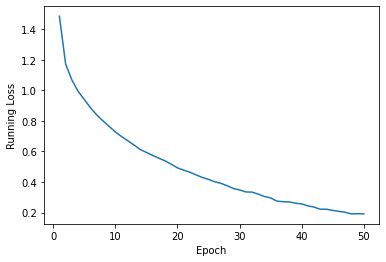

Classification Accuracy: 93.59
Epoch : 1 Loss: 0.102
Epoch : 2 Loss: 0.084
Epoch : 3 Loss: 0.080
Epoch : 4 Loss: 0.077
Epoch : 5 Loss: 0.075
Epoch : 6 Loss: 0.074
Epoch : 7 Loss: 0.073
Epoch : 8 Loss: 0.072
Epoch : 9 Loss: 0.071
Epoch : 10 Loss: 0.070
Epoch : 11 Loss: 0.069
Epoch : 12 Loss: 0.069
Epoch : 13 Loss: 0.068
Epoch : 14 Loss: 0.067
Epoch : 15 Loss: 0.067
Epoch : 16 Loss: 0.066
Epoch : 17 Loss: 0.066
Epoch : 18 Loss: 0.066
Epoch : 19 Loss: 0.065
Epoch : 20 Loss: 0.065
Epoch : 21 Loss: 0.064
Epoch : 22 Loss: 0.064
Epoch : 23 Loss: 0.064
Epoch : 24 Loss: 0.063
Epoch : 25 Loss: 0.063
Epoch : 26 Loss: 0.063
Epoch : 27 Loss: 0.062
Epoch : 28 Loss: 0.062
Epoch : 29 Loss: 0.062
Epoch : 30 Loss: 0.061
Epoch : 31 Loss: 0.061
Epoch : 32 Loss: 0.061
Epoch : 33 Loss: 0.061
Epoch : 34 Loss: 0.060
Epoch : 35 Loss: 0.060
Epoch : 36 Loss: 0.060
Epoch : 37 Loss: 0.060
Epoch : 38 Loss: 0.059
Epoch : 39 Loss: 0.059
Epoch : 40 Loss: 0.059
Epoch : 41 Loss: 0.059
Epoch : 42 Loss: 0.058
Epoch : 43 L

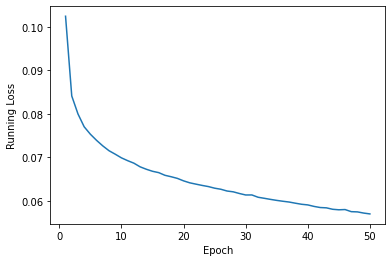

Classification Accuracy: 99.16
Epoch : 1 Loss: 0.057
Epoch : 2 Loss: 0.057
Epoch : 3 Loss: 0.057
Epoch : 4 Loss: 0.057
Epoch : 5 Loss: 0.057
Epoch : 6 Loss: 0.057
Epoch : 7 Loss: 0.056
Epoch : 8 Loss: 0.056
Epoch : 9 Loss: 0.056
Epoch : 10 Loss: 0.056
Epoch : 11 Loss: 0.056
Epoch : 12 Loss: 0.056
Epoch : 13 Loss: 0.056
Epoch : 14 Loss: 0.056
Epoch : 15 Loss: 0.056
Epoch : 16 Loss: 0.056
Epoch : 17 Loss: 0.056
Epoch : 18 Loss: 0.056
Epoch : 19 Loss: 0.056
Epoch : 20 Loss: 0.056
Epoch : 21 Loss: 0.056
Epoch : 22 Loss: 0.056
Epoch : 23 Loss: 0.056
Epoch : 24 Loss: 0.056
Epoch : 25 Loss: 0.056
Epoch : 26 Loss: 0.055
Epoch : 27 Loss: 0.055
Epoch : 28 Loss: 0.055
Epoch : 29 Loss: 0.055
Epoch : 30 Loss: 0.055
Epoch : 31 Loss: 0.055
Epoch : 32 Loss: 0.055
Epoch : 33 Loss: 0.055
Epoch : 34 Loss: 0.055
Epoch : 35 Loss: 0.055
Epoch : 36 Loss: 0.055
Epoch : 37 Loss: 0.055
Epoch : 38 Loss: 0.055
Epoch : 39 Loss: 0.055
Epoch : 40 Loss: 0.055
Epoch : 41 Loss: 0.055
Epoch : 42 Loss: 0.055
Epoch : 43 L

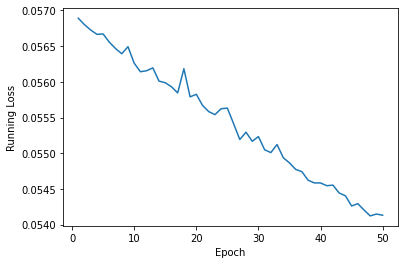

Classification Accuracy: 99.22
Epoch : 1 Loss: 0.054
Epoch : 2 Loss: 0.053
Epoch : 3 Loss: 0.053
Epoch : 4 Loss: 0.053
Epoch : 5 Loss: 0.053
Epoch : 6 Loss: 0.053
Epoch : 7 Loss: 0.053
Epoch : 8 Loss: 0.053
Epoch : 9 Loss: 0.053
Epoch : 10 Loss: 0.053
Epoch : 11 Loss: 0.053
Epoch : 12 Loss: 0.053
Epoch : 13 Loss: 0.053
Epoch : 14 Loss: 0.053
Epoch : 15 Loss: 0.053
Epoch : 16 Loss: 0.053
Epoch : 17 Loss: 0.053
Epoch : 18 Loss: 0.053
Epoch : 19 Loss: 0.053
Epoch : 20 Loss: 0.053
Epoch : 21 Loss: 0.053
Epoch : 22 Loss: 0.053
Epoch : 23 Loss: 0.053
Epoch : 24 Loss: 0.053
Epoch : 25 Loss: 0.053
Epoch : 26 Loss: 0.053
Epoch : 27 Loss: 0.053
Epoch : 28 Loss: 0.053
Epoch : 29 Loss: 0.053
Epoch : 30 Loss: 0.053
Epoch : 31 Loss: 0.053
Epoch : 32 Loss: 0.053
Epoch : 33 Loss: 0.053
Epoch : 34 Loss: 0.053
Epoch : 35 Loss: 0.053
Epoch : 36 Loss: 0.053
Epoch : 37 Loss: 0.053
Epoch : 38 Loss: 0.053
Epoch : 39 Loss: 0.053
Epoch : 40 Loss: 0.053
Epoch : 41 Loss: 0.053
Epoch : 42 Loss: 0.053
Epoch : 43 L

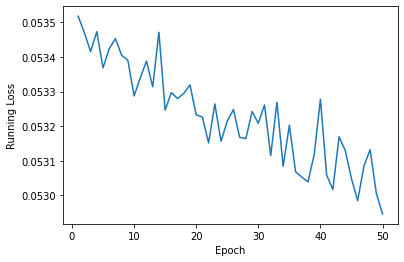

Classification Accuracy: 99.23


In [13]:
run(cnn1_sigmoid,50)

Epoch : 1 Loss: 1.223
Epoch : 2 Loss: 1.023
Epoch : 3 Loss: 0.964
Epoch : 4 Loss: 0.930
Epoch : 5 Loss: 0.921
Epoch : 6 Loss: 0.902
Epoch : 7 Loss: 0.888
Epoch : 8 Loss: 0.875
Epoch : 9 Loss: 0.860
Epoch : 10 Loss: 0.859
Epoch : 11 Loss: 0.852
Epoch : 12 Loss: 0.838
Epoch : 13 Loss: 0.848
Epoch : 14 Loss: 0.841
Epoch : 15 Loss: 0.825
Epoch : 16 Loss: 0.823
Epoch : 17 Loss: 0.817
Epoch : 18 Loss: 0.821
Epoch : 19 Loss: 0.813
Epoch : 20 Loss: 0.819
Epoch : 21 Loss: 0.825
Epoch : 22 Loss: 0.819
Epoch : 23 Loss: 0.812
Epoch : 24 Loss: 0.796
Epoch : 25 Loss: 0.799
Epoch : 26 Loss: 0.813
Epoch : 27 Loss: 0.790
Epoch : 28 Loss: 0.804
Epoch : 29 Loss: 0.799
Epoch : 30 Loss: 0.798
Epoch : 31 Loss: 0.792
Epoch : 32 Loss: 0.800
Epoch : 33 Loss: 0.799
Epoch : 34 Loss: 0.784
Epoch : 35 Loss: 0.779
Epoch : 36 Loss: 0.800
Epoch : 37 Loss: 0.798
Epoch : 38 Loss: 0.787
Epoch : 39 Loss: 0.790
Epoch : 40 Loss: 0.793
Epoch : 41 Loss: 0.792
Epoch : 42 Loss: 0.796
Epoch : 43 Loss: 0.787
Epoch : 44 Loss: 0.7

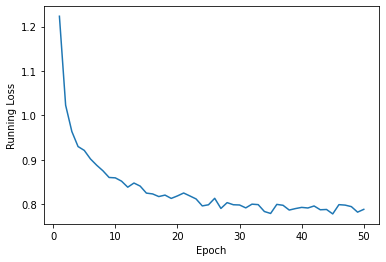

Classification Accuracy: 62.02
Epoch : 1 Loss: 0.695
Epoch : 2 Loss: 0.656
Epoch : 3 Loss: 0.638
Epoch : 4 Loss: 0.625
Epoch : 5 Loss: 0.614
Epoch : 6 Loss: 0.606
Epoch : 7 Loss: 0.598
Epoch : 8 Loss: 0.591
Epoch : 9 Loss: 0.585
Epoch : 10 Loss: 0.579
Epoch : 11 Loss: 0.574
Epoch : 12 Loss: 0.570
Epoch : 13 Loss: 0.566
Epoch : 14 Loss: 0.563
Epoch : 15 Loss: 0.559
Epoch : 16 Loss: 0.556
Epoch : 17 Loss: 0.552
Epoch : 18 Loss: 0.549
Epoch : 19 Loss: 0.547
Epoch : 20 Loss: 0.545
Epoch : 21 Loss: 0.542
Epoch : 22 Loss: 0.539
Epoch : 23 Loss: 0.538
Epoch : 24 Loss: 0.536
Epoch : 25 Loss: 0.533
Epoch : 26 Loss: 0.531
Epoch : 27 Loss: 0.530
Epoch : 28 Loss: 0.527
Epoch : 29 Loss: 0.526
Epoch : 30 Loss: 0.525
Epoch : 31 Loss: 0.522
Epoch : 32 Loss: 0.520
Epoch : 33 Loss: 0.520
Epoch : 34 Loss: 0.517
Epoch : 35 Loss: 0.516
Epoch : 36 Loss: 0.515
Epoch : 37 Loss: 0.513
Epoch : 38 Loss: 0.511
Epoch : 39 Loss: 0.511
Epoch : 40 Loss: 0.510
Epoch : 41 Loss: 0.508
Epoch : 42 Loss: 0.507
Epoch : 43 L

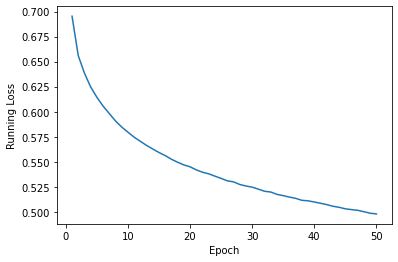

Classification Accuracy: 77.92
Epoch : 1 Loss: 0.550
Epoch : 2 Loss: 0.554
Epoch : 3 Loss: 0.562
Epoch : 4 Loss: 0.553
Epoch : 5 Loss: 0.549
Epoch : 6 Loss: 0.561
Epoch : 7 Loss: 0.555
Epoch : 8 Loss: 0.548
Epoch : 9 Loss: 0.542
Epoch : 10 Loss: 0.544
Epoch : 11 Loss: 0.540
Epoch : 12 Loss: 0.549
Epoch : 13 Loss: 0.550
Epoch : 14 Loss: 0.543
Epoch : 15 Loss: 0.541
Epoch : 16 Loss: 0.543
Epoch : 17 Loss: 0.544
Epoch : 18 Loss: 0.545
Epoch : 19 Loss: 0.540
Epoch : 20 Loss: 0.553
Epoch : 21 Loss: 0.541
Epoch : 22 Loss: 0.541
Epoch : 23 Loss: 0.544
Epoch : 24 Loss: 0.538
Epoch : 25 Loss: 0.561
Epoch : 26 Loss: 0.540
Epoch : 27 Loss: 0.551
Epoch : 28 Loss: 0.553
Epoch : 29 Loss: 0.543
Epoch : 30 Loss: 0.547
Epoch : 31 Loss: 0.554
Epoch : 32 Loss: 0.555
Epoch : 33 Loss: 0.556
Epoch : 34 Loss: 0.549
Epoch : 35 Loss: 0.546
Epoch : 36 Loss: 0.542
Epoch : 37 Loss: 0.537
Epoch : 38 Loss: 0.539
Epoch : 39 Loss: 0.542
Epoch : 40 Loss: 0.540
Epoch : 41 Loss: 0.537
Epoch : 42 Loss: 0.537
Epoch : 43 L

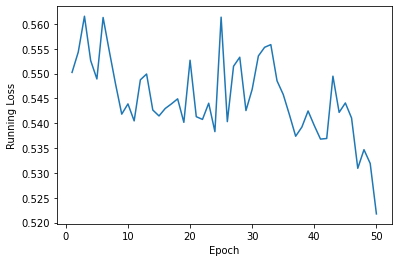

Classification Accuracy: 76.29
Epoch : 1 Loss: 0.498
Epoch : 2 Loss: 0.495
Epoch : 3 Loss: 0.494
Epoch : 4 Loss: 0.494
Epoch : 5 Loss: 0.494
Epoch : 6 Loss: 0.494
Epoch : 7 Loss: 0.493
Epoch : 8 Loss: 0.492
Epoch : 9 Loss: 0.494
Epoch : 10 Loss: 0.491
Epoch : 11 Loss: 0.493
Epoch : 12 Loss: 0.492
Epoch : 13 Loss: 0.492
Epoch : 14 Loss: 0.491
Epoch : 15 Loss: 0.492
Epoch : 16 Loss: 0.491
Epoch : 17 Loss: 0.490
Epoch : 18 Loss: 0.490
Epoch : 19 Loss: 0.492
Epoch : 20 Loss: 0.491
Epoch : 21 Loss: 0.490
Epoch : 22 Loss: 0.492
Epoch : 23 Loss: 0.490
Epoch : 24 Loss: 0.491
Epoch : 25 Loss: 0.489
Epoch : 26 Loss: 0.490
Epoch : 27 Loss: 0.489
Epoch : 28 Loss: 0.491
Epoch : 29 Loss: 0.490
Epoch : 30 Loss: 0.490
Epoch : 31 Loss: 0.489
Epoch : 32 Loss: 0.490
Epoch : 33 Loss: 0.489
Epoch : 34 Loss: 0.491
Epoch : 35 Loss: 0.490
Epoch : 36 Loss: 0.488
Epoch : 37 Loss: 0.488
Epoch : 38 Loss: 0.490
Epoch : 39 Loss: 0.488
Epoch : 40 Loss: 0.487
Epoch : 41 Loss: 0.489
Epoch : 42 Loss: 0.487
Epoch : 43 L

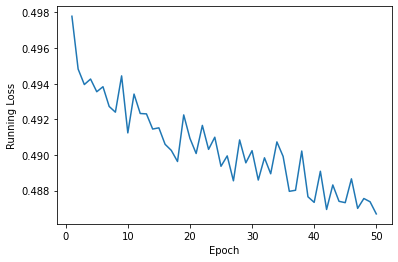

Classification Accuracy: 77.50


In [14]:
run(cnn1_tanh,50)

/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py:554: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Epoch : 1 Loss: 1.303
Epoch : 2 Loss: 1.087
Epoch : 3 Loss: 1.022
Epoch : 4 Loss: 0.987
Epoch : 5 Loss: 0.961
Epoch : 6 Loss: 0.952
Epoch : 7 Loss: 0.923
Epoch : 8 Loss: 0.903
Epoch : 9 Loss: 0.900
Epoch : 10 Loss: 0.882
Epoch : 11 Loss: 0.870
Epoch : 12 Loss: 0.858
Epoch : 13 Loss: 0.858
Epoch : 14 Loss: 0.852
Epoch : 15 Loss: 0.851
Epoch : 16 Loss: 0.838
Epoch : 17 Loss: 0.830
Epoch : 18 Loss: 0.828
Epoch : 19 Loss: 0.829
Epoch : 20 Loss: 0.829
Epoch : 21 Loss: 0.824
Epoch : 22 Loss: 0.819
Epoch : 23 Loss: 0.807
Epoch : 24 Loss: 0.805
Epoch : 25 Loss: 0.805
Epoch : 26 Loss: 0.804
Epoch : 27 Loss: 0.807
Epoch : 28 Loss: 0.795
Epoch : 29 Loss: 0.799
Epoch : 30 Loss: 0.789
Epoch : 31 Loss: 0.796
Epoch : 32 Loss: 0.792
Epoch : 33 Loss: 0.788
Epoch : 34 Loss: 0.778
Epoch : 35 Loss: 0.786
Epoch : 36 Loss: 0.779
Epoch : 37 Loss: 0.778
Epoch : 38 Loss: 0.778
Epoch : 39 Loss: 0.773
Epoch : 40 Loss: 0.767
Epoch : 41 Loss: 0.773
Epoch : 42 Loss: 0.783
Epoch : 43 Loss: 0.771
Epoch : 44 Loss: 0.7

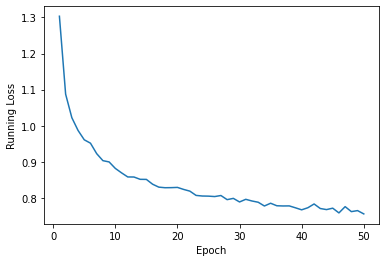

Classification Accuracy: 65.62
Epoch : 1 Loss: 0.664
Epoch : 2 Loss: 0.631
Epoch : 3 Loss: 0.622
Epoch : 4 Loss: 0.618
Epoch : 5 Loss: 0.613
Epoch : 6 Loss: 0.610
Epoch : 7 Loss: 0.608
Epoch : 8 Loss: 0.606
Epoch : 9 Loss: 0.604
Epoch : 10 Loss: 0.603
Epoch : 11 Loss: 0.601
Epoch : 12 Loss: 0.600
Epoch : 13 Loss: 0.598
Epoch : 14 Loss: 0.597
Epoch : 15 Loss: 0.596
Epoch : 16 Loss: 0.595
Epoch : 17 Loss: 0.594
Epoch : 18 Loss: 0.594
Epoch : 19 Loss: 0.593
Epoch : 20 Loss: 0.592
Epoch : 21 Loss: 0.591
Epoch : 22 Loss: 0.591
Epoch : 23 Loss: 0.590
Epoch : 24 Loss: 0.589
Epoch : 25 Loss: 0.589
Epoch : 26 Loss: 0.588
Epoch : 27 Loss: 0.587
Epoch : 28 Loss: 0.587
Epoch : 29 Loss: 0.587
Epoch : 30 Loss: 0.586
Epoch : 31 Loss: 0.586
Epoch : 32 Loss: 0.585
Epoch : 33 Loss: 0.585
Epoch : 34 Loss: 0.584
Epoch : 35 Loss: 0.585
Epoch : 36 Loss: 0.583
Epoch : 37 Loss: 0.582
Epoch : 38 Loss: 0.582
Epoch : 39 Loss: 0.582
Epoch : 40 Loss: 0.582
Epoch : 41 Loss: 0.582
Epoch : 42 Loss: 0.581
Epoch : 43 L

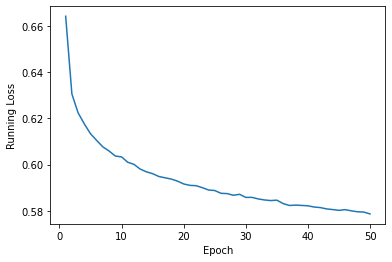

Classification Accuracy: 73.38
Epoch : 1 Loss: 0.607
Epoch : 2 Loss: 0.610
Epoch : 3 Loss: 0.605
Epoch : 4 Loss: 0.605
Epoch : 5 Loss: 0.602
Epoch : 6 Loss: 0.603
Epoch : 7 Loss: 0.605
Epoch : 8 Loss: 0.603
Epoch : 9 Loss: 0.603
Epoch : 10 Loss: 0.602
Epoch : 11 Loss: 0.600
Epoch : 12 Loss: 0.601
Epoch : 13 Loss: 0.602
Epoch : 14 Loss: 0.598
Epoch : 15 Loss: 0.598
Epoch : 16 Loss: 0.602
Epoch : 17 Loss: 0.597
Epoch : 18 Loss: 0.598
Epoch : 19 Loss: 0.598
Epoch : 20 Loss: 0.597
Epoch : 21 Loss: 0.597
Epoch : 22 Loss: 0.596
Epoch : 23 Loss: 0.594
Epoch : 24 Loss: 0.596
Epoch : 25 Loss: 0.596
Epoch : 26 Loss: 0.596
Epoch : 27 Loss: 0.594
Epoch : 28 Loss: 0.594
Epoch : 29 Loss: 0.594
Epoch : 30 Loss: 0.594
Epoch : 31 Loss: 0.595
Epoch : 32 Loss: 0.592
Epoch : 33 Loss: 0.594
Epoch : 34 Loss: 0.593
Epoch : 35 Loss: 0.592
Epoch : 36 Loss: 0.591
Epoch : 37 Loss: 0.593
Epoch : 38 Loss: 0.590
Epoch : 39 Loss: 0.592
Epoch : 40 Loss: 0.591
Epoch : 41 Loss: 0.592
Epoch : 42 Loss: 0.592
Epoch : 43 L

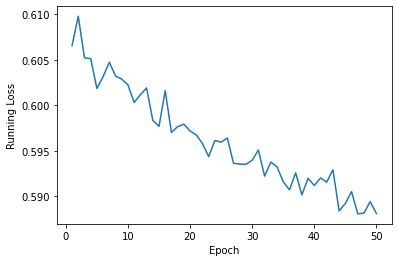

Classification Accuracy: 73.42
Epoch : 1 Loss: 0.567
Epoch : 2 Loss: 0.566
Epoch : 3 Loss: 0.565
Epoch : 4 Loss: 0.565
Epoch : 5 Loss: 0.564
Epoch : 6 Loss: 0.564
Epoch : 7 Loss: 0.564
Epoch : 8 Loss: 0.564
Epoch : 9 Loss: 0.564
Epoch : 10 Loss: 0.564
Epoch : 11 Loss: 0.564
Epoch : 12 Loss: 0.563
Epoch : 13 Loss: 0.563
Epoch : 14 Loss: 0.563
Epoch : 15 Loss: 0.563
Epoch : 16 Loss: 0.562
Epoch : 17 Loss: 0.563
Epoch : 18 Loss: 0.562
Epoch : 19 Loss: 0.564
Epoch : 20 Loss: 0.563
Epoch : 21 Loss: 0.563
Epoch : 22 Loss: 0.562
Epoch : 23 Loss: 0.563
Epoch : 24 Loss: 0.563
Epoch : 25 Loss: 0.562
Epoch : 26 Loss: 0.562
Epoch : 27 Loss: 0.561
Epoch : 28 Loss: 0.561
Epoch : 29 Loss: 0.562
Epoch : 30 Loss: 0.562
Epoch : 31 Loss: 0.562
Epoch : 32 Loss: 0.562
Epoch : 33 Loss: 0.561
Epoch : 34 Loss: 0.561
Epoch : 35 Loss: 0.561
Epoch : 36 Loss: 0.561
Epoch : 37 Loss: 0.561
Epoch : 38 Loss: 0.560
Epoch : 39 Loss: 0.561
Epoch : 40 Loss: 0.561
Epoch : 41 Loss: 0.560
Epoch : 42 Loss: 0.561
Epoch : 43 L

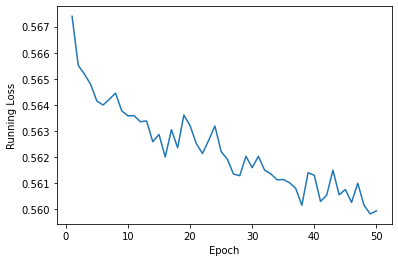

Classification Accuracy: 74.19


In [55]:
run(cnn2_relu,50)

Epoch : 1 Loss: 1.532
Epoch : 2 Loss: 1.220
Epoch : 3 Loss: 1.081
Epoch : 4 Loss: 0.998
Epoch : 5 Loss: 0.936
Epoch : 6 Loss: 0.893
Epoch : 7 Loss: 0.847
Epoch : 8 Loss: 0.816
Epoch : 9 Loss: 0.792
Epoch : 10 Loss: 0.770
Epoch : 11 Loss: 0.749
Epoch : 12 Loss: 0.736
Epoch : 13 Loss: 0.708
Epoch : 14 Loss: 0.694
Epoch : 15 Loss: 0.682
Epoch : 16 Loss: 0.666
Epoch : 17 Loss: 0.662
Epoch : 18 Loss: 0.640
Epoch : 19 Loss: 0.630
Epoch : 20 Loss: 0.624
Epoch : 21 Loss: 0.616
Epoch : 22 Loss: 0.611
Epoch : 23 Loss: 0.597
Epoch : 24 Loss: 0.587
Epoch : 25 Loss: 0.577
Epoch : 26 Loss: 0.575
Epoch : 27 Loss: 0.564
Epoch : 28 Loss: 0.556
Epoch : 29 Loss: 0.556
Epoch : 30 Loss: 0.547
Epoch : 31 Loss: 0.534
Epoch : 32 Loss: 0.527
Epoch : 33 Loss: 0.527
Epoch : 34 Loss: 0.525
Epoch : 35 Loss: 0.511
Epoch : 36 Loss: 0.509
Epoch : 37 Loss: 0.502
Epoch : 38 Loss: 0.501
Epoch : 39 Loss: 0.497
Epoch : 40 Loss: 0.490
Epoch : 41 Loss: 0.481
Epoch : 42 Loss: 0.477
Epoch : 43 Loss: 0.473
Epoch : 44 Loss: 0.4

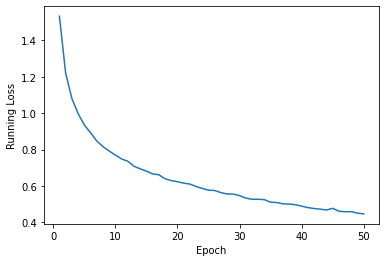

Classification Accuracy: 79.83
Epoch : 1 Loss: 0.362
Epoch : 2 Loss: 0.341
Epoch : 3 Loss: 0.336
Epoch : 4 Loss: 0.333
Epoch : 5 Loss: 0.331
Epoch : 6 Loss: 0.329
Epoch : 7 Loss: 0.328
Epoch : 8 Loss: 0.327
Epoch : 9 Loss: 0.325
Epoch : 10 Loss: 0.324
Epoch : 11 Loss: 0.324
Epoch : 12 Loss: 0.323
Epoch : 13 Loss: 0.322
Epoch : 14 Loss: 0.321
Epoch : 15 Loss: 0.321
Epoch : 16 Loss: 0.320
Epoch : 17 Loss: 0.320
Epoch : 18 Loss: 0.319
Epoch : 19 Loss: 0.318
Epoch : 20 Loss: 0.318
Epoch : 21 Loss: 0.317
Epoch : 22 Loss: 0.317
Epoch : 23 Loss: 0.316
Epoch : 24 Loss: 0.317
Epoch : 25 Loss: 0.316
Epoch : 26 Loss: 0.315
Epoch : 27 Loss: 0.315
Epoch : 28 Loss: 0.314
Epoch : 29 Loss: 0.314
Epoch : 30 Loss: 0.314
Epoch : 31 Loss: 0.314
Epoch : 32 Loss: 0.313
Epoch : 33 Loss: 0.313
Epoch : 34 Loss: 0.313
Epoch : 35 Loss: 0.313
Epoch : 36 Loss: 0.312
Epoch : 37 Loss: 0.312
Epoch : 38 Loss: 0.312
Epoch : 39 Loss: 0.311
Epoch : 40 Loss: 0.311
Epoch : 41 Loss: 0.311
Epoch : 42 Loss: 0.310
Epoch : 43 L

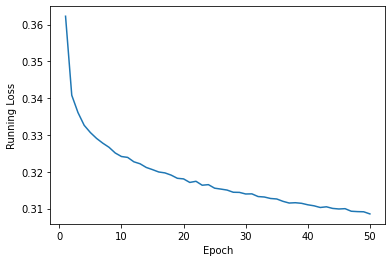

Classification Accuracy: 86.88
Epoch : 1 Loss: 0.310
Epoch : 2 Loss: 0.310
Epoch : 3 Loss: 0.310
Epoch : 4 Loss: 0.310
Epoch : 5 Loss: 0.310
Epoch : 6 Loss: 0.309
Epoch : 7 Loss: 0.309
Epoch : 8 Loss: 0.309
Epoch : 9 Loss: 0.309
Epoch : 10 Loss: 0.308
Epoch : 11 Loss: 0.308
Epoch : 12 Loss: 0.308
Epoch : 13 Loss: 0.308
Epoch : 14 Loss: 0.308
Epoch : 15 Loss: 0.308
Epoch : 16 Loss: 0.307
Epoch : 17 Loss: 0.307
Epoch : 18 Loss: 0.307
Epoch : 19 Loss: 0.307
Epoch : 20 Loss: 0.307
Epoch : 21 Loss: 0.307
Epoch : 22 Loss: 0.307
Epoch : 23 Loss: 0.306
Epoch : 24 Loss: 0.306
Epoch : 25 Loss: 0.306
Epoch : 26 Loss: 0.306
Epoch : 27 Loss: 0.305
Epoch : 28 Loss: 0.305
Epoch : 29 Loss: 0.305
Epoch : 30 Loss: 0.305
Epoch : 31 Loss: 0.305
Epoch : 32 Loss: 0.304
Epoch : 33 Loss: 0.305
Epoch : 34 Loss: 0.304
Epoch : 35 Loss: 0.304
Epoch : 36 Loss: 0.304
Epoch : 37 Loss: 0.304
Epoch : 38 Loss: 0.304
Epoch : 39 Loss: 0.305
Epoch : 40 Loss: 0.304
Epoch : 41 Loss: 0.304
Epoch : 42 Loss: 0.303
Epoch : 43 L

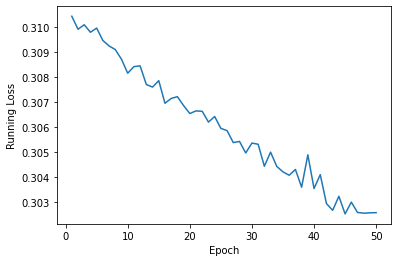

Classification Accuracy: 87.14
Epoch : 1 Loss: 0.299
Epoch : 2 Loss: 0.299
Epoch : 3 Loss: 0.299
Epoch : 4 Loss: 0.299
Epoch : 5 Loss: 0.299
Epoch : 6 Loss: 0.299
Epoch : 7 Loss: 0.299
Epoch : 8 Loss: 0.299
Epoch : 9 Loss: 0.299
Epoch : 10 Loss: 0.299
Epoch : 11 Loss: 0.299
Epoch : 12 Loss: 0.298
Epoch : 13 Loss: 0.298
Epoch : 14 Loss: 0.299
Epoch : 15 Loss: 0.299
Epoch : 16 Loss: 0.298
Epoch : 17 Loss: 0.299
Epoch : 18 Loss: 0.298
Epoch : 19 Loss: 0.299
Epoch : 20 Loss: 0.298
Epoch : 21 Loss: 0.299
Epoch : 22 Loss: 0.299
Epoch : 23 Loss: 0.298
Epoch : 24 Loss: 0.298
Epoch : 25 Loss: 0.298
Epoch : 26 Loss: 0.298
Epoch : 27 Loss: 0.298
Epoch : 28 Loss: 0.298
Epoch : 29 Loss: 0.298
Epoch : 30 Loss: 0.298
Epoch : 31 Loss: 0.299
Epoch : 32 Loss: 0.298
Epoch : 33 Loss: 0.298
Epoch : 34 Loss: 0.298
Epoch : 35 Loss: 0.298
Epoch : 36 Loss: 0.298
Epoch : 37 Loss: 0.298
Epoch : 38 Loss: 0.298
Epoch : 39 Loss: 0.298
Epoch : 40 Loss: 0.298
Epoch : 41 Loss: 0.298
Epoch : 42 Loss: 0.297
Epoch : 43 L

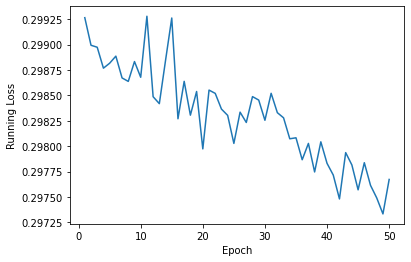

Classification Accuracy: 87.36


In [56]:
run(cnn2_sigmoid,50)

Epoch : 1 Loss: 1.269
Epoch : 2 Loss: 1.056
Epoch : 3 Loss: 1.013
Epoch : 4 Loss: 0.959
Epoch : 5 Loss: 0.947
Epoch : 6 Loss: 0.936
Epoch : 7 Loss: 0.929
Epoch : 8 Loss: 0.912
Epoch : 9 Loss: 0.916
Epoch : 10 Loss: 0.924
Epoch : 11 Loss: 0.916
Epoch : 12 Loss: 0.905
Epoch : 13 Loss: 0.921
Epoch : 14 Loss: 0.915
Epoch : 15 Loss: 0.919
Epoch : 16 Loss: 0.920
Epoch : 17 Loss: 0.905
Epoch : 18 Loss: 0.915
Epoch : 19 Loss: 0.926
Epoch : 20 Loss: 0.929
Epoch : 21 Loss: 0.921
Epoch : 22 Loss: 0.911
Epoch : 23 Loss: 0.919
Epoch : 24 Loss: 0.926
Epoch : 25 Loss: 0.927
Epoch : 26 Loss: 0.919
Epoch : 27 Loss: 0.915
Epoch : 28 Loss: 0.924
Epoch : 29 Loss: 0.914
Epoch : 30 Loss: 0.939
Epoch : 31 Loss: 0.944
Epoch : 32 Loss: 0.945
Epoch : 33 Loss: 0.938
Epoch : 34 Loss: 0.938
Epoch : 35 Loss: 0.930
Epoch : 36 Loss: 0.942
Epoch : 37 Loss: 0.933
Epoch : 38 Loss: 0.941
Epoch : 39 Loss: 0.938
Epoch : 40 Loss: 0.953
Epoch : 41 Loss: 0.932
Epoch : 42 Loss: 0.931
Epoch : 43 Loss: 0.940
Epoch : 44 Loss: 0.9

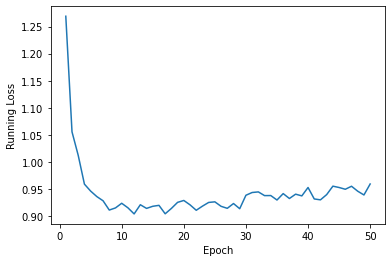

Classification Accuracy: 57.17
Epoch : 1 Loss: 0.896
Epoch : 2 Loss: 0.864
Epoch : 3 Loss: 0.851
Epoch : 4 Loss: 0.842
Epoch : 5 Loss: 0.832
Epoch : 6 Loss: 0.825
Epoch : 7 Loss: 0.818
Epoch : 8 Loss: 0.811
Epoch : 9 Loss: 0.807
Epoch : 10 Loss: 0.802
Epoch : 11 Loss: 0.797
Epoch : 12 Loss: 0.793
Epoch : 13 Loss: 0.790
Epoch : 14 Loss: 0.787
Epoch : 15 Loss: 0.784
Epoch : 16 Loss: 0.781
Epoch : 17 Loss: 0.779
Epoch : 18 Loss: 0.776
Epoch : 19 Loss: 0.774
Epoch : 20 Loss: 0.771
Epoch : 21 Loss: 0.770
Epoch : 22 Loss: 0.768
Epoch : 23 Loss: 0.766
Epoch : 24 Loss: 0.764
Epoch : 25 Loss: 0.763
Epoch : 26 Loss: 0.760
Epoch : 27 Loss: 0.759
Epoch : 28 Loss: 0.758
Epoch : 29 Loss: 0.756
Epoch : 30 Loss: 0.755
Epoch : 31 Loss: 0.754
Epoch : 32 Loss: 0.752
Epoch : 33 Loss: 0.752
Epoch : 34 Loss: 0.750
Epoch : 35 Loss: 0.749
Epoch : 36 Loss: 0.748
Epoch : 37 Loss: 0.747
Epoch : 38 Loss: 0.746
Epoch : 39 Loss: 0.745
Epoch : 40 Loss: 0.743
Epoch : 41 Loss: 0.743
Epoch : 42 Loss: 0.742
Epoch : 43 L

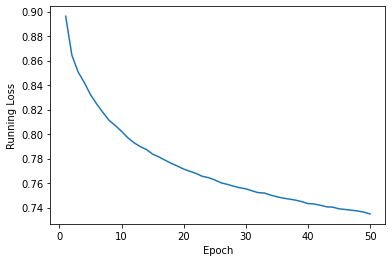

Classification Accuracy: 66.54
Epoch : 1 Loss: 0.822
Epoch : 2 Loss: 0.850
Epoch : 3 Loss: 0.835
Epoch : 4 Loss: 0.845
Epoch : 5 Loss: 0.836
Epoch : 6 Loss: 0.839
Epoch : 7 Loss: 0.839
Epoch : 8 Loss: 0.841
Epoch : 9 Loss: 0.839
Epoch : 10 Loss: 0.829
Epoch : 11 Loss: 0.832
Epoch : 12 Loss: 0.829
Epoch : 13 Loss: 0.830
Epoch : 14 Loss: 0.826
Epoch : 15 Loss: 0.824
Epoch : 16 Loss: 0.828
Epoch : 17 Loss: 0.833
Epoch : 18 Loss: 0.825
Epoch : 19 Loss: 0.826
Epoch : 20 Loss: 0.827
Epoch : 21 Loss: 0.833
Epoch : 22 Loss: 0.829
Epoch : 23 Loss: 0.824
Epoch : 24 Loss: 0.822
Epoch : 25 Loss: 0.818
Epoch : 26 Loss: 0.825
Epoch : 27 Loss: 0.827
Epoch : 28 Loss: 0.817
Epoch : 29 Loss: 0.819
Epoch : 30 Loss: 0.814
Epoch : 31 Loss: 0.822
Epoch : 32 Loss: 0.817
Epoch : 33 Loss: 0.817
Epoch : 34 Loss: 0.814
Epoch : 35 Loss: 0.815
Epoch : 36 Loss: 0.820
Epoch : 37 Loss: 0.814
Epoch : 38 Loss: 0.813
Epoch : 39 Loss: 0.812
Epoch : 40 Loss: 0.811
Epoch : 41 Loss: 0.812
Epoch : 42 Loss: 0.811
Epoch : 43 L

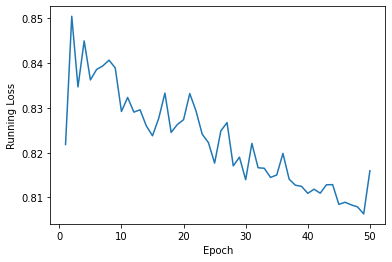

Classification Accuracy: 62.96
Epoch : 1 Loss: 0.793
Epoch : 2 Loss: 0.788
Epoch : 3 Loss: 0.783
Epoch : 4 Loss: 0.782
Epoch : 5 Loss: 0.781
Epoch : 6 Loss: 0.781
Epoch : 7 Loss: 0.778
Epoch : 8 Loss: 0.777
Epoch : 9 Loss: 0.776
Epoch : 10 Loss: 0.776
Epoch : 11 Loss: 0.774
Epoch : 12 Loss: 0.773
Epoch : 13 Loss: 0.772
Epoch : 14 Loss: 0.772
Epoch : 15 Loss: 0.772
Epoch : 16 Loss: 0.771
Epoch : 17 Loss: 0.770
Epoch : 18 Loss: 0.768
Epoch : 19 Loss: 0.767
Epoch : 20 Loss: 0.766
Epoch : 21 Loss: 0.766
Epoch : 22 Loss: 0.765
Epoch : 23 Loss: 0.765
Epoch : 24 Loss: 0.762
Epoch : 25 Loss: 0.762
Epoch : 26 Loss: 0.761
Epoch : 27 Loss: 0.761
Epoch : 28 Loss: 0.761
Epoch : 29 Loss: 0.760
Epoch : 30 Loss: 0.759
Epoch : 31 Loss: 0.758
Epoch : 32 Loss: 0.759
Epoch : 33 Loss: 0.757
Epoch : 34 Loss: 0.756
Epoch : 35 Loss: 0.755
Epoch : 36 Loss: 0.753
Epoch : 37 Loss: 0.755
Epoch : 38 Loss: 0.753
Epoch : 39 Loss: 0.752
Epoch : 40 Loss: 0.751
Epoch : 41 Loss: 0.751
Epoch : 42 Loss: 0.750
Epoch : 43 L

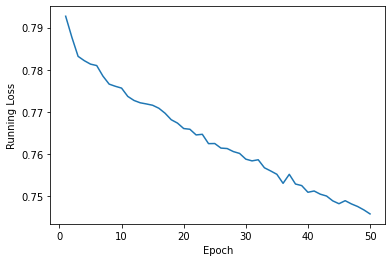

Classification Accuracy: 64.99


In [57]:
run(cnn2_tanh,50)